In [ ]:
#import networkx
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
#Create undirected graph
G = nx.Graph()

In [ ]:
G.add_nodes_from([1,2,3,4])
G.add_edges_from([(1,4),(1,2),(2,3),(3,4)])

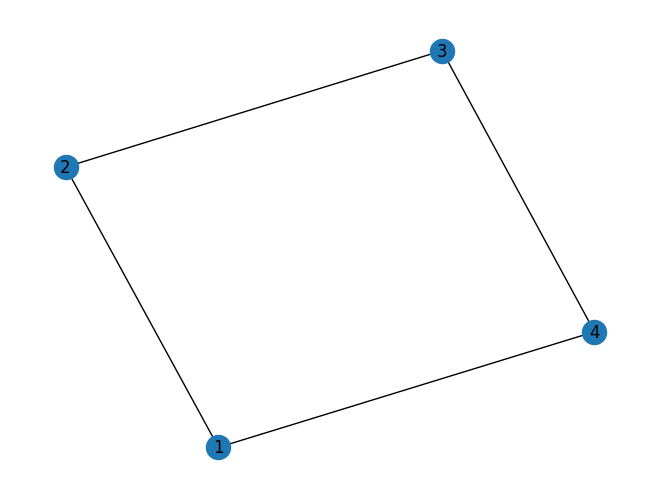

In [ ]:
#show graph
nx.draw(G, with_labels=True)
plt.show()

In [ ]:
#Directed graph
H = nx.DiGraph()
H.add_nodes_from([1,2,3,4])
H.add_edges_from([(1,2),(2,3),(3,1),(3,4)])

In [ ]:
#adjacency matrix
adjacency_matrix = nx.adjacency_matrix(H).todense()

In [ ]:
print(adjacency_matrix)

[[0 1 0 0]
 [0 0 1 0]
 [1 0 0 1]
 [0 0 0 0]]


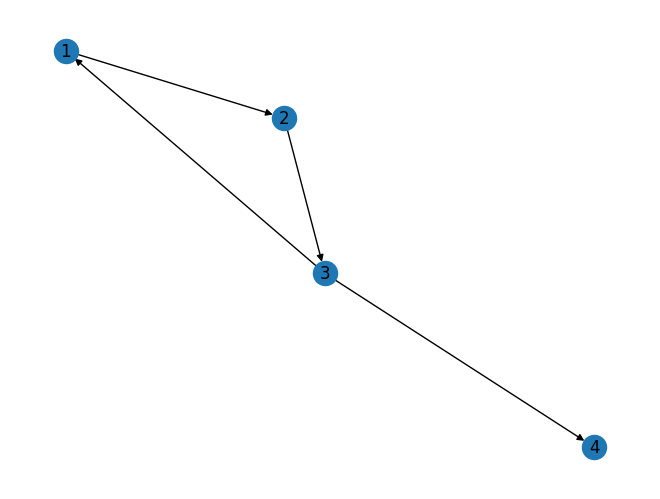

In [ ]:
#show
nx.draw(H, with_labels=True)
plt.show()

In [ ]:
adj_list={node:list(H.neighbors(node)) for node in H.nodes()}

In [ ]:
print(adj_list)

{1: [2], 2: [3], 3: [1, 4], 4: []}


In [1]:
import heapq

def dijkstra(graph, start, end):
    priority_queue = [(0, start)]  # (cost, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {}

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_node == end:
            path = []
            while current_node in previous_nodes:
                path.append(current_node)
                current_node = previous_nodes[current_node]
            path.append(start)
            return list(reversed(path)), distances[end]

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

    return None, float('inf')

roads = {
    'A': {'B': 4, 'C': 2},
    'B': {'A': 4, 'C': 5, 'D': 10},
    'C': {'A': 2, 'B': 5, 'D': 3, 'E': 8},
    'D': {'B': 10, 'C': 3, 'E': 6, 'F': 2},
    'E': {'C': 8, 'D': 6, 'F': 4},
    'F': {'D': 2, 'E': 4}
}

shortest_path, distance = dijkstra(roads, 'A', 'F')
print(f"Shortest path from A to F: {shortest_path} with distance {distance}")


Shortest path from A to F: ['A', 'C', 'D', 'F'] with distance 7


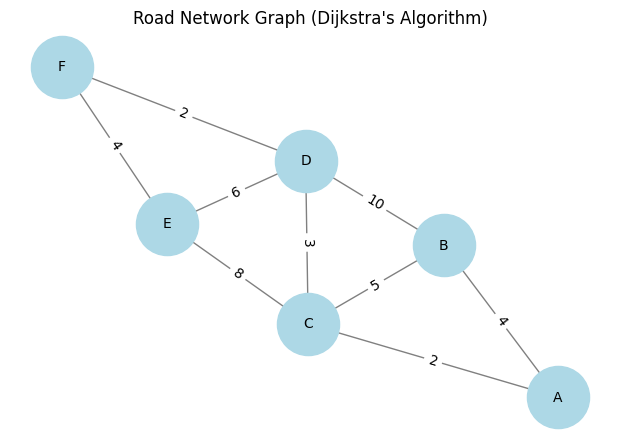

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Road Network (Dijkstra's Algorithm)
road_graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'A': 4, 'C': 5, 'D': 10},
    'C': {'A': 2, 'B': 5, 'D': 3, 'E': 8},
    'D': {'B': 10, 'C': 3, 'E': 6, 'F': 2},
    'E': {'C': 8, 'D': 6, 'F': 4},
    'F': {'D': 2, 'E': 4}
}

G1 = nx.Graph()
for node, edges in road_graph.items():
    for neighbor, weight in edges.items():
        G1.add_edge(node, neighbor, weight=weight)

pos1 = nx.spring_layout(G1, seed=42)  # Positioning the nodes
plt.figure(figsize=(6, 4))
nx.draw(G1, pos1, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)
edge_labels = {(u, v): d['weight'] for u, v, d in G1.edges(data=True)}
nx.draw_networkx_edge_labels(G1, pos1, edge_labels=edge_labels, font_size=10)
plt.title("Road Network Graph (Dijkstra's Algorithm)")
plt.show()


In [7]:
# Compute the shortest path using Dijkstra's algorithm
source_node = 'A'
target_node = 'F'

shortest_path = nx.dijkstra_path(G1, source=source_node, target=target_node, weight='weight')
shortest_path_length = nx.dijkstra_path_length(G1, source=source_node, target=target_node, weight='weight')

shortest_path

# Compute the shortest path using Dijkstra's algorithm
source_node = 'A'
target_node = 'F'

shortest_path = nx.dijkstra_path(G1, source=source_node, target=target_node, weight='weight')
shortest_path_length = nx.dijkstra_path_length(G1, source=source_node, target=target_node, weight='weight')

print(shortest_path)

print(shortest_path_length)


['A', 'C', 'D', 'F']
7
